In [1]:
#加载需要使用的库
%matplotlib inline
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc3 as pm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import pearsonr


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
#数据预处理与可视化
np.random.seed(123)  #随机数种子，确保随后生成的随机数相同
# data0 = pd.read_csv("/home/mw/input/1242517/eating_survey.csv.gz")  #读取数据
data0 = pd.read_csv("D:/STAR CR/universty/grade 4 semester1/Advanced Statistics/homework/sss_homework/eating_survey.csv")  #读取数据

data0 = data0.set_index('worker_id')#设置索引
es=data0.groupby('worker_id').response.sum()#变量赋值，便于后续调用
thr_e = pd.DataFrame()
es_item = pd.DataFrame()#转置数据便于计算
for i in range(1,19):
    column_name='es'+str(i)
    es_item[column_name]=data0[data0['question_num']==i+1]['response']

cog = ['es2','es11','es12','es15','es16','es18']
uncon = ['es1','es4','es5','es7','es8','es9','es13','es14','es17']
emo = ['es3','es6','es10']
thr_e['cog_res']= es_item.loc[:,cog].sum(axis=1)
thr_e['uncon_e']= es_item.loc[:,uncon].sum(axis=1)
thr_e['emo_e']= es_item.loc[:,emo].sum(axis=1)
thr_e.describe()  #描述统计


,cog_res,uncon_e,emo_e
count,522.000000,522.000000,522.000000
mean,13.639847,18.689655,6.264368
std,4.017785,5.301961,2.658242
min,6.000000,9.000000,3.000000
25%,11.000000,15.000000,4.000000
50%,14.000000,18.000000,6.000000
75%,17.000000,22.000000,8.000000
max,24.000000,32.000000,12.000000


<AxesSubplot:ylabel='Density'>

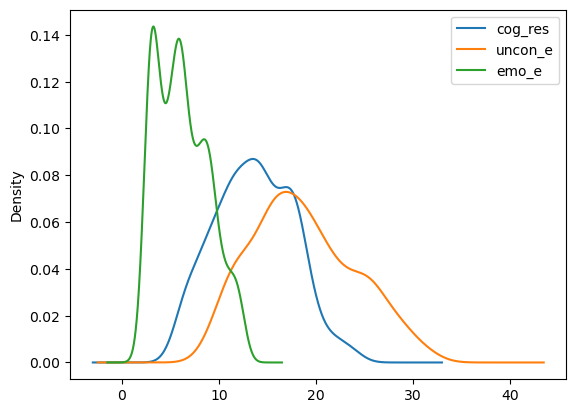

In [3]:
thr_e.plot.density()  #绘制量表得分的概率密度图

<AxesSubplot:ylabel='Frequency'>

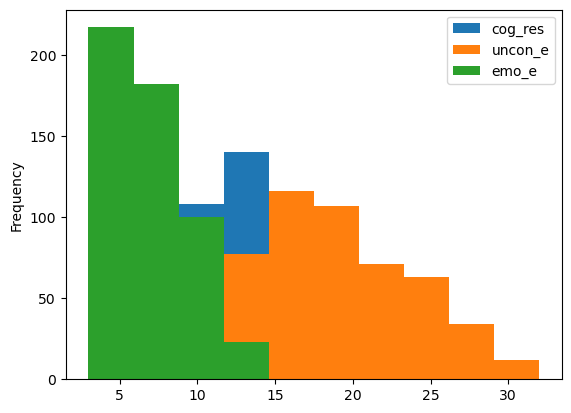

In [4]:
thr_e.plot.hist()  #绘制量表得分的直方图

In [5]:
# data1 = pd.read_csv("/home/mw/input/1258529/ten_item_personality_survey.csv.gz")
data1 = pd.read_csv("D:/STAR CR/universty/grade 4 semester1/Advanced Statistics/homework/sss_homework/ten_item_personality_survey.csv")  #读取数据
data1 = data1.set_index('worker_id')
ten_p = pd.DataFrame()

for i in range(1,11):
    column_name='ten_p'+str(i)
    if i % 2==0:
        ten_p[column_name]=abs(8-data1[data1['question_num']==i+2]['response'])
    else:
        ten_p[column_name] = data1[data1['question_num']==i+2]['response']
five_p=pd.DataFrame()
five_p['Extra']= ten_p['ten_p1']+ten_p['ten_p6']
five_p['Agree']= ten_p['ten_p2']+ten_p['ten_p7']
five_p['Cons']= ten_p['ten_p3']+ten_p['ten_p8']
five_p['Emo']= ten_p['ten_p4']+ten_p['ten_p9']
five_p['Open']= ten_p['ten_p5']+ten_p['ten_p10']
five_p.describe()

,Extra,Agree,Cons,Emo,Open
count,522.000000,522.000000,522.000000,522.000000,522.000000
mean,8.519157,8.078544,8.216475,8.494253,8.162835
std,1.421192,1.741323,1.297079,1.357769,1.758532
min,2.000000,2.000000,5.000000,3.000000,2.000000
25%,8.000000,7.000000,7.000000,8.000000,7.000000
50%,8.000000,8.000000,8.000000,8.000000,8.000000
75%,9.000000,9.000000,9.000000,9.000000,9.000000
max,13.000000,14.000000,14.000000,14.000000,14.000000


<AxesSubplot:ylabel='Density'>

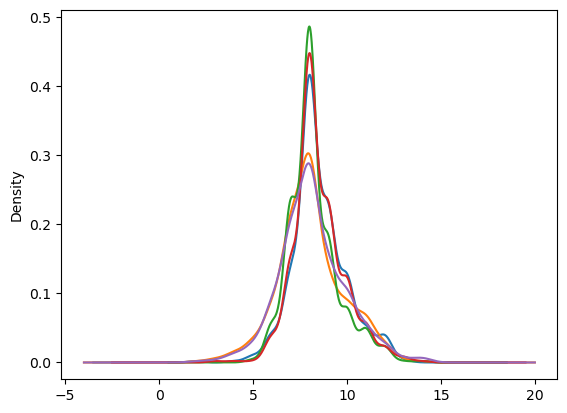

In [6]:
five_p['Extra'].plot.density()
five_p['Agree'].plot.density()
five_p['Cons'].plot.density()
five_p['Emo'].plot.density()
five_p['Open'].plot.density()

<AxesSubplot:ylabel='Frequency'>

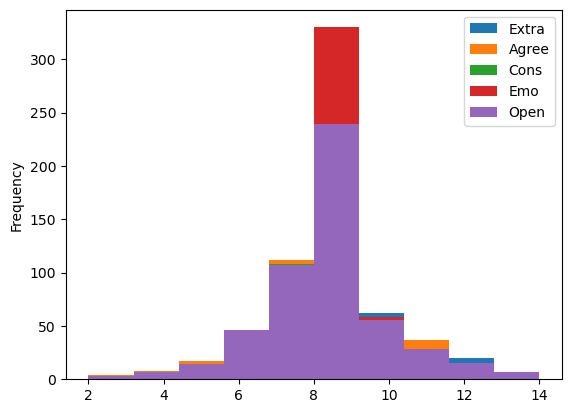

In [7]:
five_p.plot.hist()

In [8]:
# data2 = pd.read_csv("/home/mw/input/1258529/time_perspective_survey.csv.gz")
data2 = pd.read_csv("D:/STAR CR/universty/grade 4 semester1/Advanced Statistics/homework/sss_homework/time_perspective_survey.csv")  #读取数据
tp = pd.DataFrame()
data2=data2.set_index('worker_id')
for i in range(1,57):
    column_name='time_p'+str(i)
    if i in [9,24,25,41,56]:
        tp[column_name]=abs(6-data2[data2['question_num']==i+1]['response'])
    else:
        tp[column_name] = data2[data2['question_num']==i+1]['response']
five_tp=pd.DataFrame()
Past_Neg = ['time_p4', 'time_p5', 'time_p16', 'time_p22', 'time_p27', 'time_p33', 'time_p34', 'time_p36', 'time_p50', 'time_p54']
Present_Hed=['time_p1', 'time_p8', 'time_p12', 'time_p17', 'time_p19', 'time_p23', 'time_p26', 'time_p28', 'time_p31', 'time_p32', 'time_p42', 'time_p44', 'time_p46', 'time_p48', 'time_p55']
Future=['time_p6', 'time_p9', 'time_p10', 'time_p13', 'time_p18', 'time_p21', 'time_p24', 'time_p30', 'time_p40', 'time_p43', 'time_p45', 'time_p51', 'time_p56']
Past_Pos=['time_p2', 'time_p7', 'time_p11', 'time_p15', 'time_p20', 'time_p25', 'time_p29','time_p41','time_p49']
Present_Fat = ['time_p3', 'time_p14', 'time_p35','time_p37', 'time_p38', 'time_p39', 'time_p47', 'time_p52', 'time_p53']
five_tp['Past_Neg']= tp.loc[:,Past_Neg].mean(axis=1)
five_tp['Present_Hed']= tp.loc[:,Present_Hed].mean(axis=1)
five_tp['Future']= tp.loc[:,Future].mean(axis=1)
five_tp['Past_Pos']= tp.loc[:,Past_Pos].mean(axis=1)
five_tp['Present_Fat']= tp.loc[:,Present_Fat].mean(axis=1)
five_tp.describe()

,Past_Neg,Present_Hed,Future,Past_Pos,Present_Fat
count,522.000000,522.000000,522.000000,522.000000,522.000000
mean,3.103640,2.957727,3.598291,3.275223,2.374202
std,0.804072,0.608542,0.392872,0.525825,0.656916
min,1.000000,1.400000,2.076923,1.666667,1.000000
25%,2.500000,2.533333,3.384615,3.000000,2.000000
50%,3.100000,2.933333,3.615385,3.333333,2.333333
75%,3.700000,3.333333,3.846154,3.666667,2.777778
max,4.900000,4.666667,5.000000,4.444444,4.555556


<AxesSubplot:ylabel='Density'>

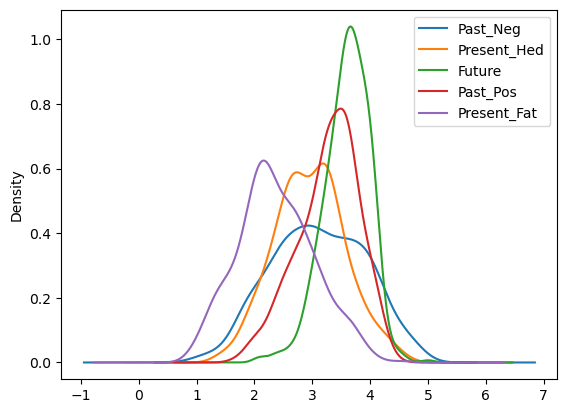

In [9]:
five_tp.plot.density()

<AxesSubplot:ylabel='Frequency'>

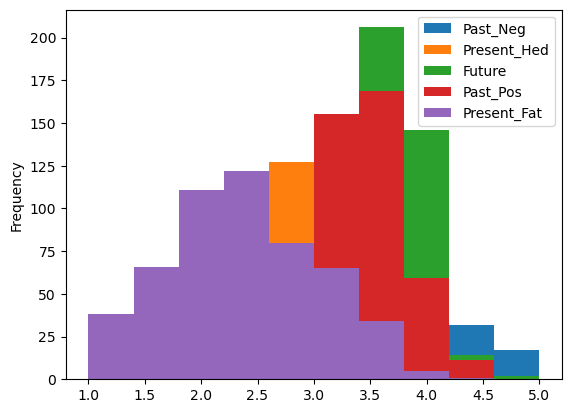

In [10]:
five_tp.plot.hist()

In [11]:
#数据整合
data_all = pd.concat((five_tp,five_p,thr_e),axis=1)
#data_all = data_all.rename({0:'time_p'},axis='columns')
data_all.describe()

,Past_Neg,Present_Hed,Future,Past_Pos,Present_Fat,Extra,Agree,Cons,Emo,Open,cog_res,uncon_e,emo_e
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,3.103640,2.957727,3.598291,3.275223,2.374202,8.519157,8.078544,8.216475,8.494253,8.162835,13.639847,18.689655,6.264368
std,0.804072,0.608542,0.392872,0.525825,0.656916,1.421192,1.741323,1.297079,1.357769,1.758532,4.017785,5.301961,2.658242
min,1.000000,1.400000,2.076923,1.666667,1.000000,2.000000,2.000000,5.000000,3.000000,2.000000,6.000000,9.000000,3.000000
25%,2.500000,2.533333,3.384615,3.000000,2.000000,8.000000,7.000000,7.000000,8.000000,7.000000,11.000000,15.000000,4.000000
50%,3.100000,2.933333,3.615385,3.333333,2.333333,8.000000,8.000000,8.000000,8.000000,8.000000,14.000000,18.000000,6.000000
75%,3.700000,3.333333,3.846154,3.666667,2.777778,9.000000,9.000000,9.000000,9.000000,9.000000,17.000000,22.000000,8.000000
max,4.900000,4.666667,5.000000,4.444444,4.555556,13.000000,14.000000,14.000000,14.000000,14.000000,24.000000,32.000000,12.000000


In [12]:
list(data_all.columns)

['Past_Neg',
 'Present_Hed',
 'Future',
 'Past_Pos',
 'Present_Fat',
 'Extra',
 'Agree',
 'Cons',
 'Emo',
 'Open',
 'cog_res',
 'uncon_e',
 'emo_e']

In [13]:
data_all.columns

Index(['Past_Neg', 'Present_Hed', 'Future', 'Past_Pos', 'Present_Fat', 'Extra',
       'Agree', 'Cons', 'Emo', 'Open', 'cog_res', 'uncon_e', 'emo_e'],
      dtype='object')

In [14]:
#将变量标准化
#for i in list(data_all.columns):
#    data_all[i] = (data_all[i] - data_all[i].mean()) / data_all[i].std()
#data_all.head(10)

In [15]:
data_all.describe()

,Past_Neg,Present_Hed,Future,Past_Pos,Present_Fat,Extra,Agree,Cons,Emo,Open,cog_res,uncon_e,emo_e
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,3.103640,2.957727,3.598291,3.275223,2.374202,8.519157,8.078544,8.216475,8.494253,8.162835,13.639847,18.689655,6.264368
std,0.804072,0.608542,0.392872,0.525825,0.656916,1.421192,1.741323,1.297079,1.357769,1.758532,4.017785,5.301961,2.658242
min,1.000000,1.400000,2.076923,1.666667,1.000000,2.000000,2.000000,5.000000,3.000000,2.000000,6.000000,9.000000,3.000000
25%,2.500000,2.533333,3.384615,3.000000,2.000000,8.000000,7.000000,7.000000,8.000000,7.000000,11.000000,15.000000,4.000000
50%,3.100000,2.933333,3.615385,3.333333,2.333333,8.000000,8.000000,8.000000,8.000000,8.000000,14.000000,18.000000,6.000000
75%,3.700000,3.333333,3.846154,3.666667,2.777778,9.000000,9.000000,9.000000,9.000000,9.000000,17.000000,22.000000,8.000000
max,4.900000,4.666667,5.000000,4.444444,4.555556,13.000000,14.000000,14.000000,14.000000,14.000000,24.000000,32.000000,12.000000


In [16]:
data_all.shape[1]

13

# 相关分析和散点图

In [17]:
data_all.iloc[:,0]

worker_id
s001    2.7
s002    2.8
s003    3.4
s004    2.1
s005    3.1
       ... 
s554    2.4
s556    2.4
s557    4.0
s559    3.6
s560    4.1
Name: Past_Neg, Length: 522, dtype: float64

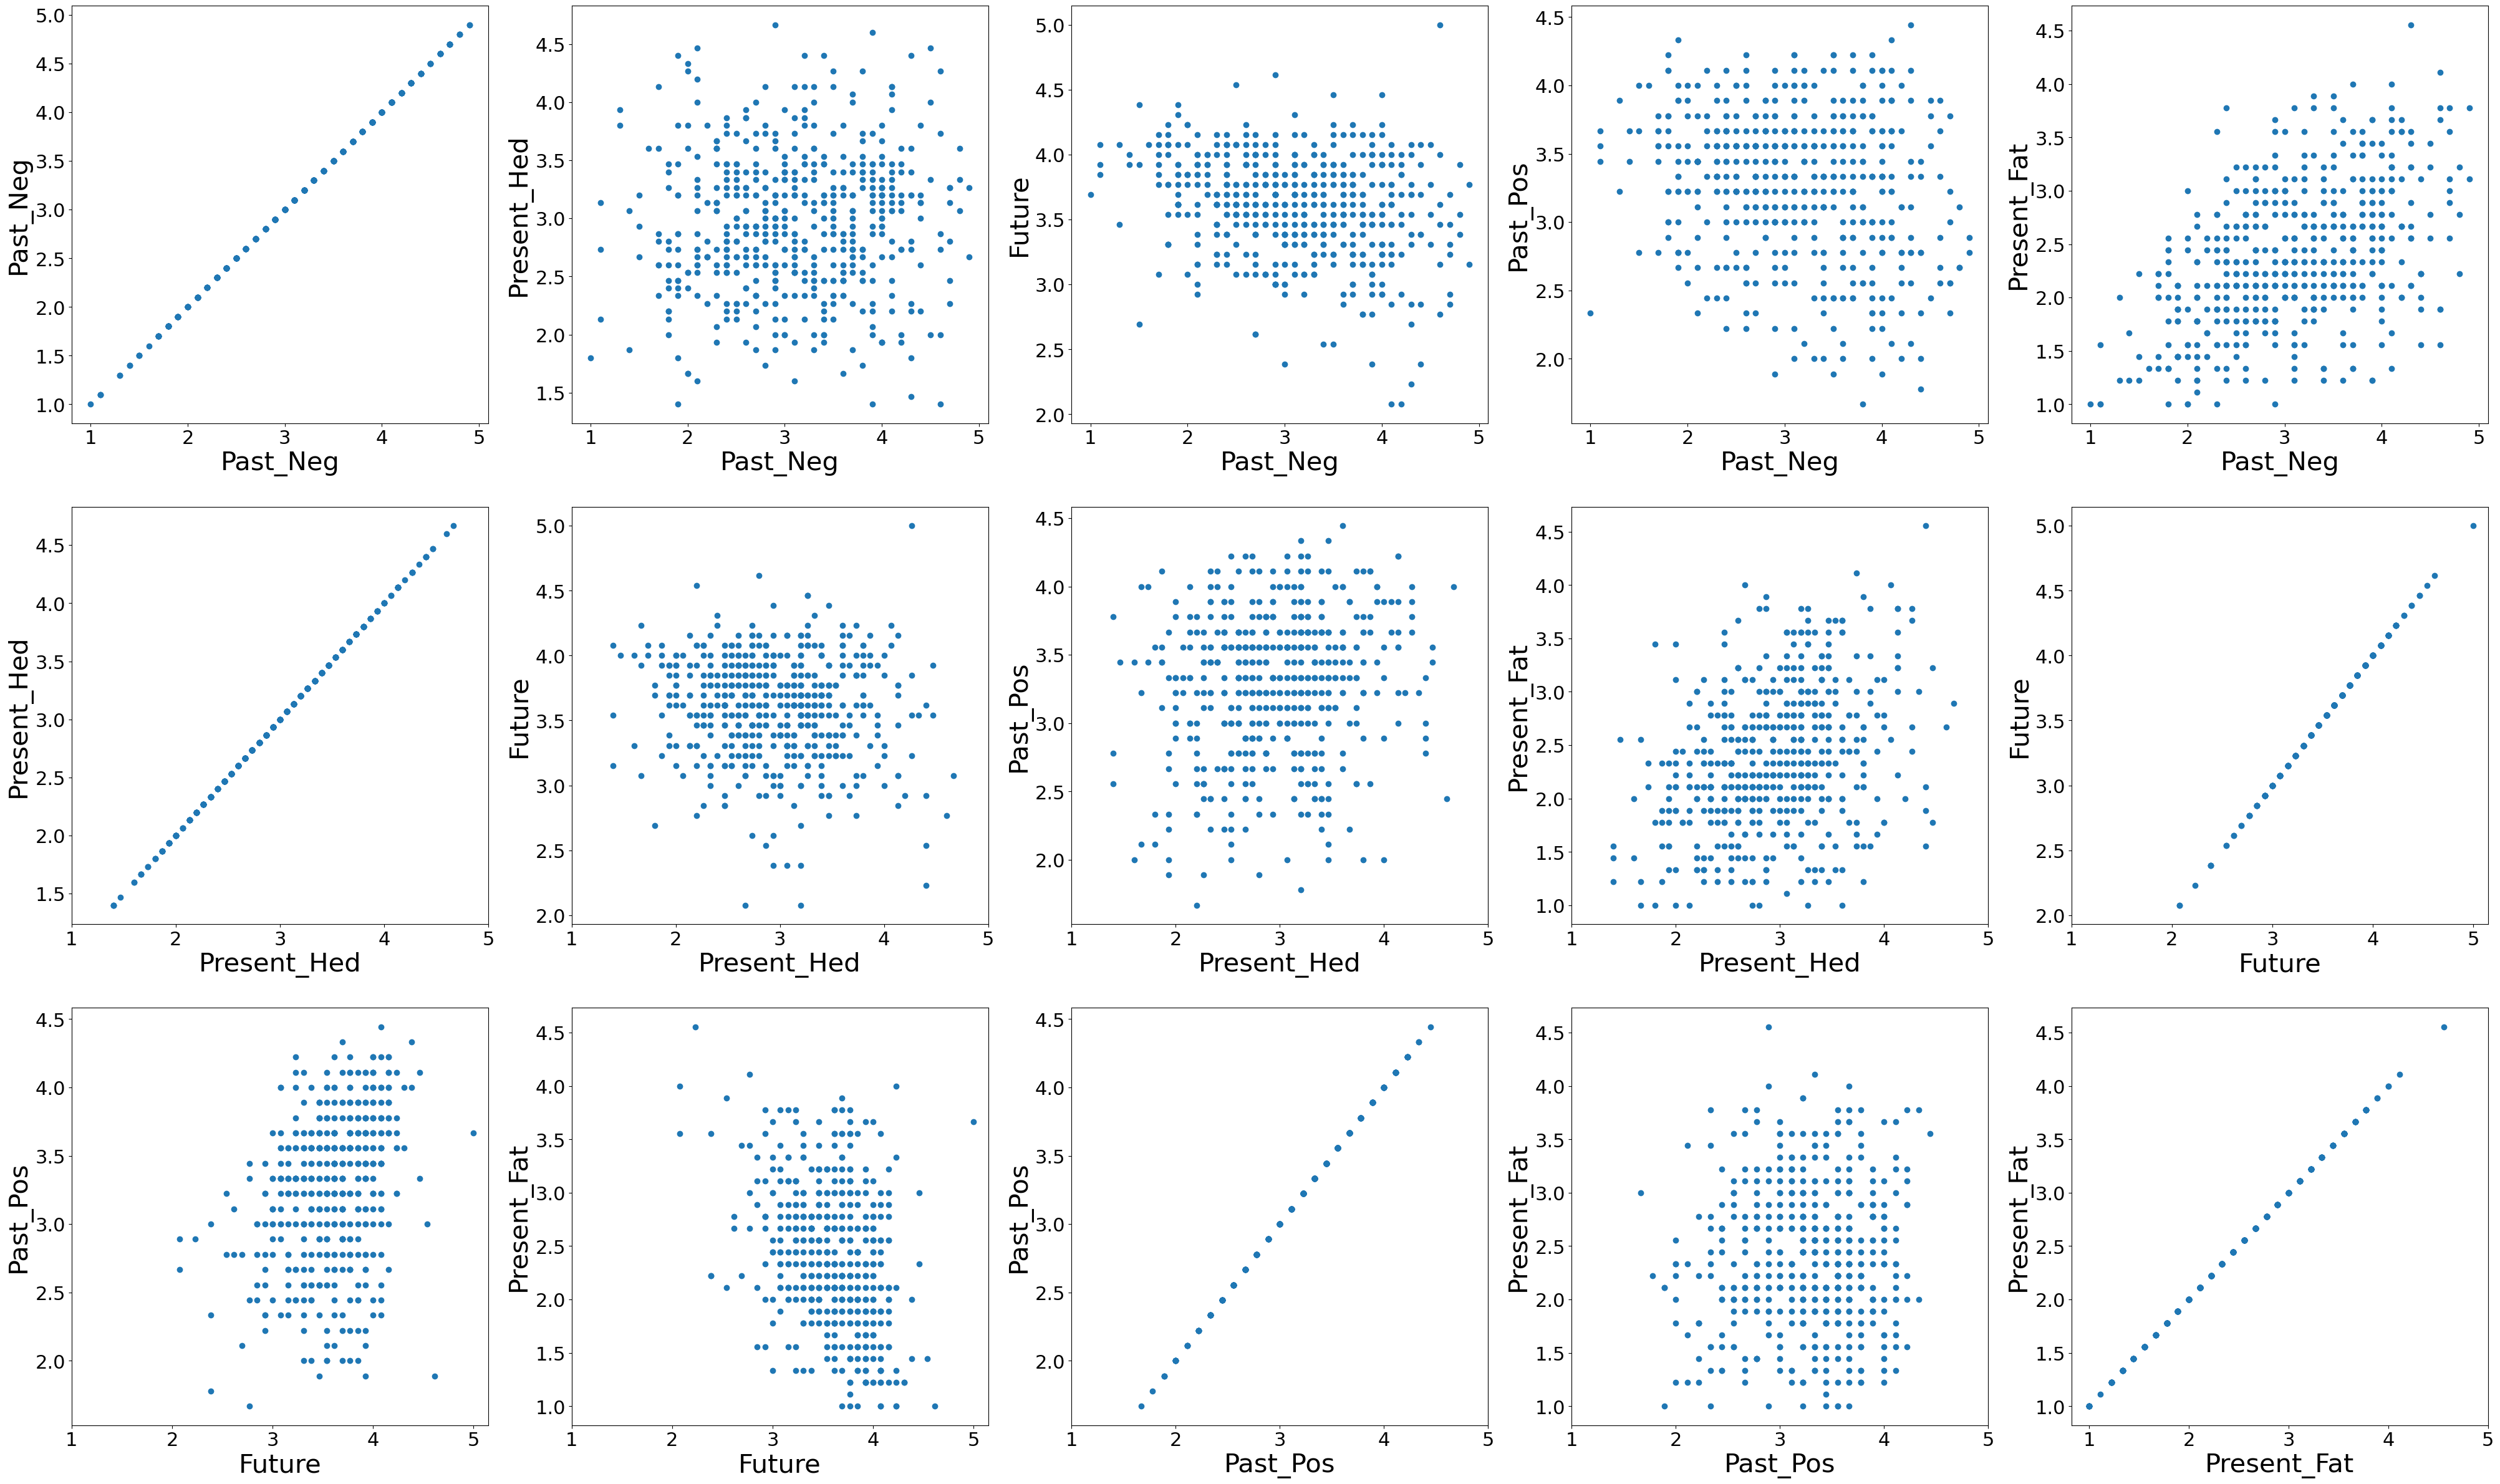

In [18]:
# FTP自相关
s=30
ls=22
fig = plt.figure(figsize=(50,40));
k=0
for i in range(0,5):
    k=k+1
    for j in range(i,5):
        plt.subplot(4,5,k)
        x = np.array(data_all.iloc[:,i])
        y = np.array(data_all.iloc[:,j])
        plt.scatter(x, y)
        plt.ylabel(data_all.columns[j],fontsize=s);plt.xlabel(data_all.columns[i],fontsize=s)
        plt.tick_params(labelsize=ls)
        x=plt.xticks(np.arange(1,6))
        if k!=5and k!=9 and k!=12 and k!=14:
            k=k+1

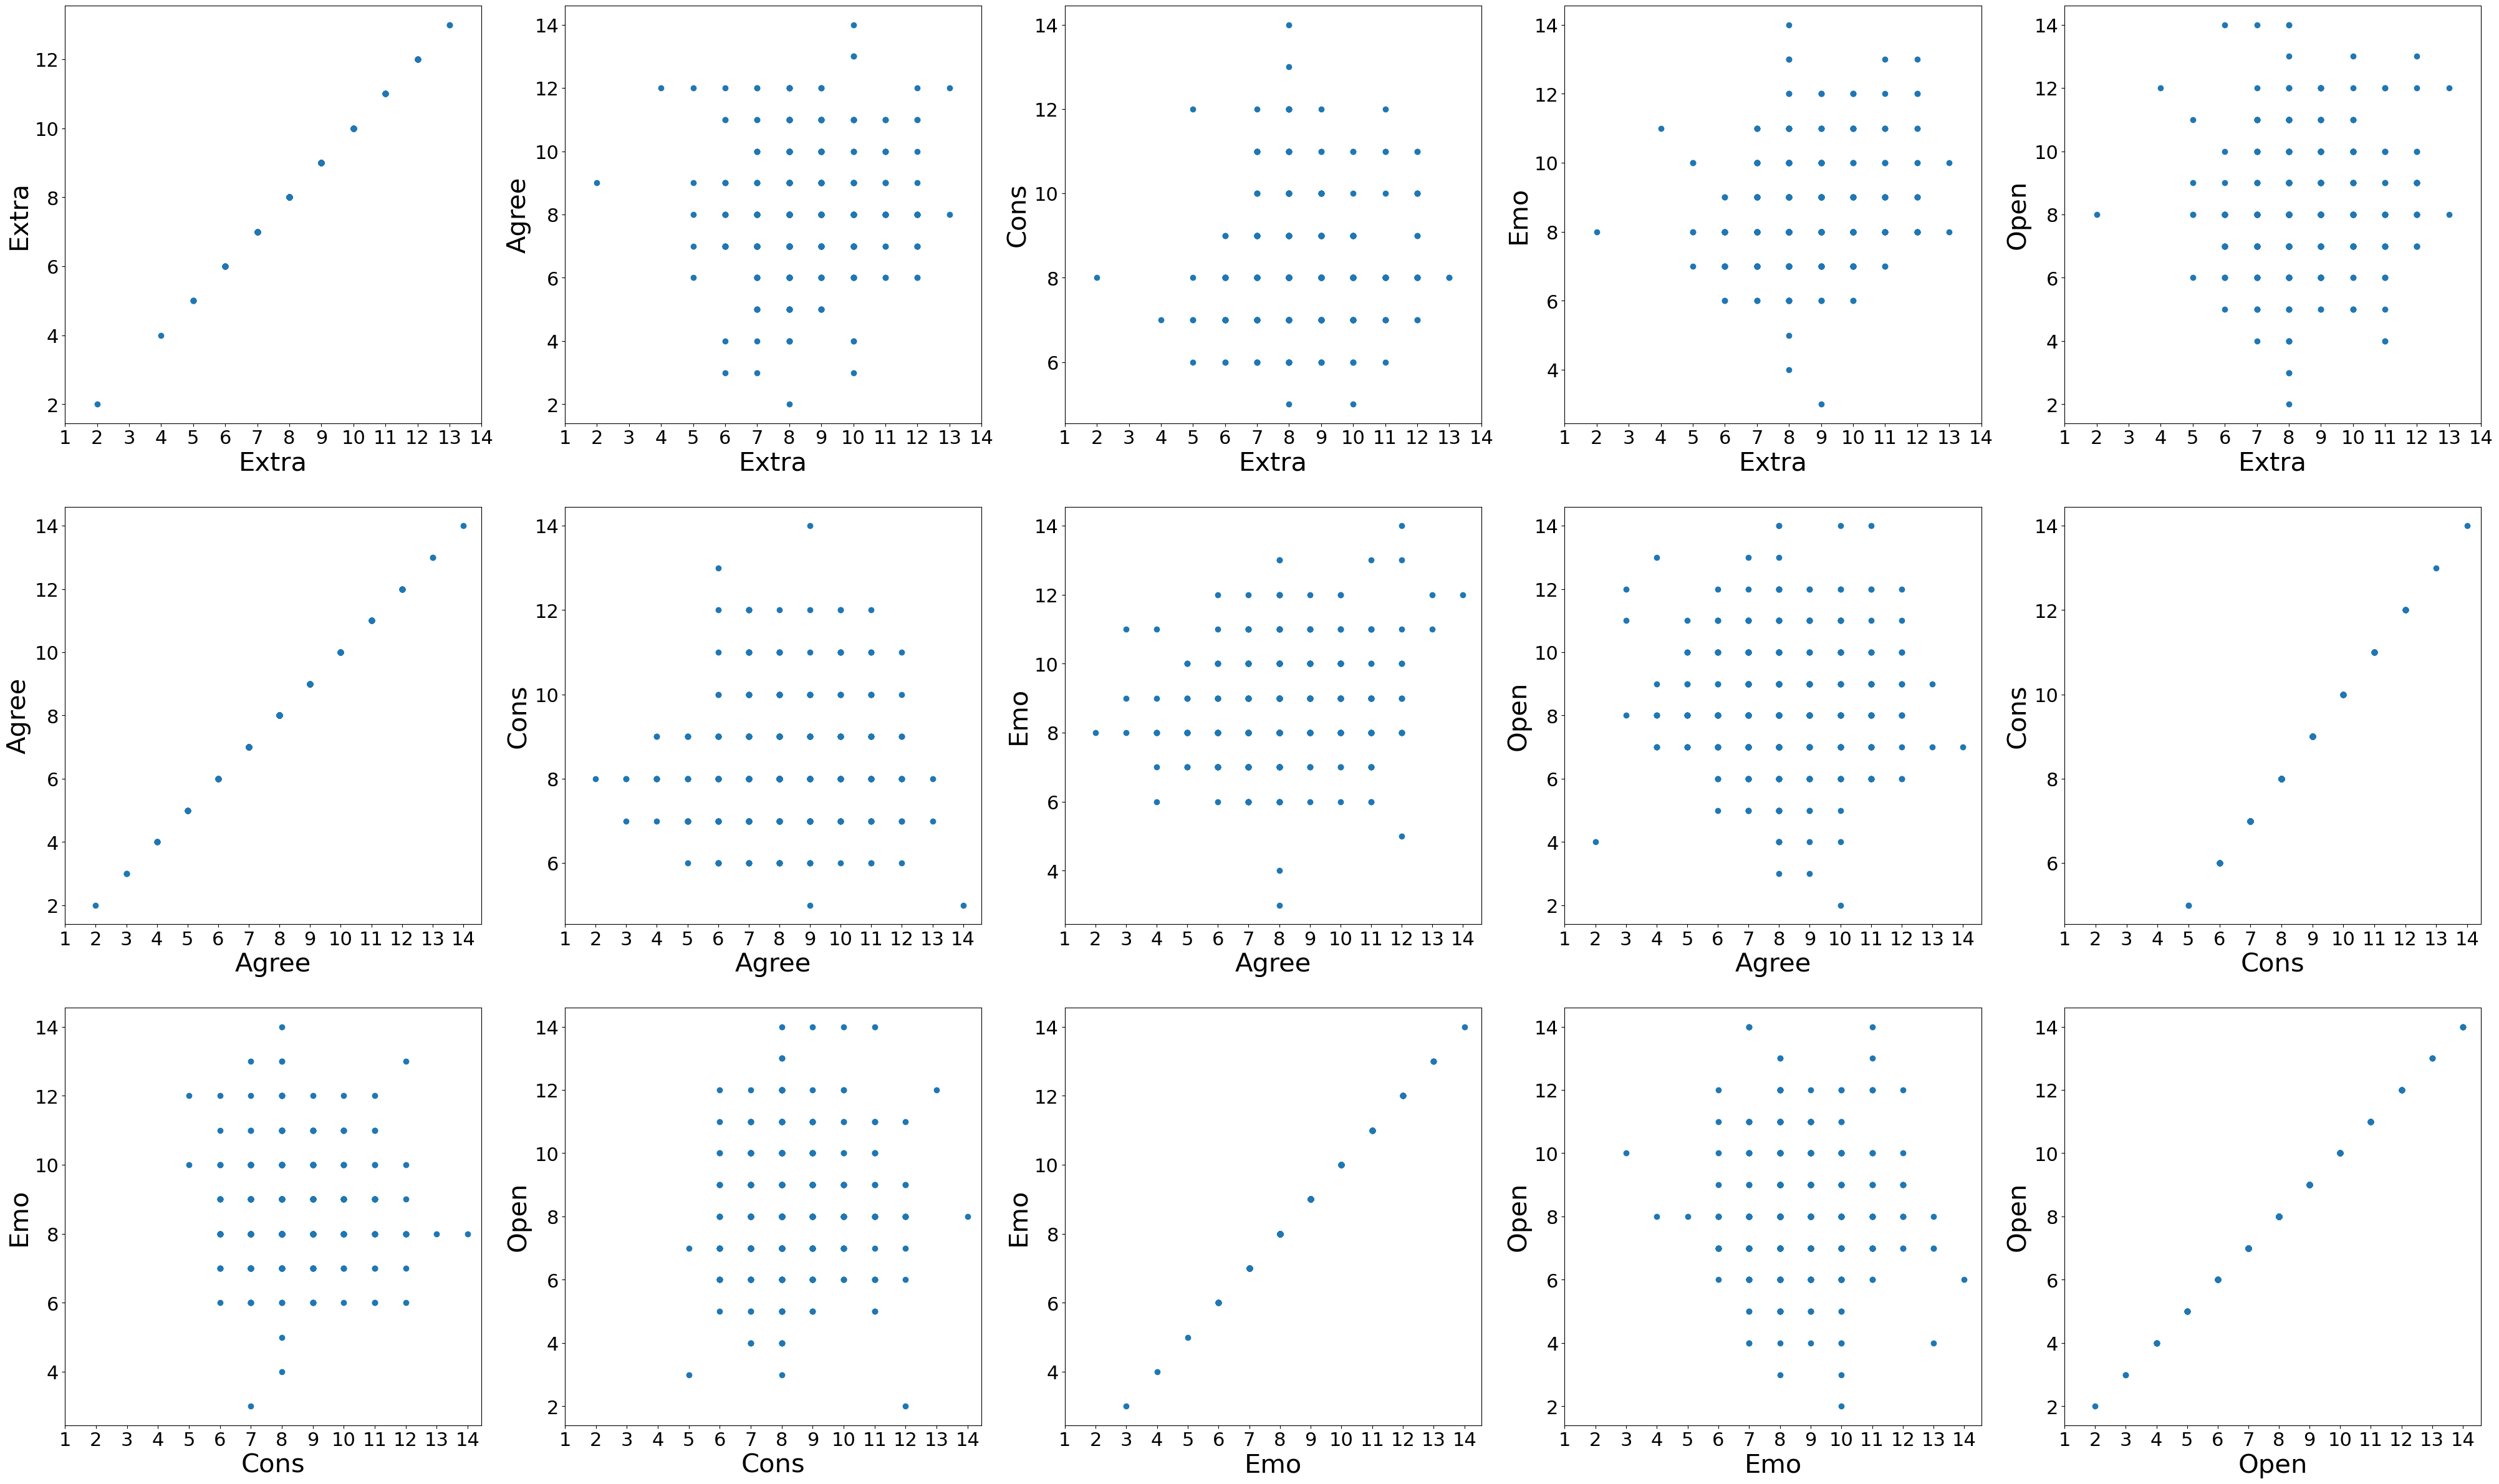

In [122]:
# 大五人格自相关
fig = plt.figure(figsize=(50,40));
k=0
for i in range(5,10):
    k=k+1
    for j in range(i,10):
        plt.subplot(4,5,k)
        x = np.array(data_all.iloc[:,i])
        y = np.array(data_all.iloc[:,j])
        plt.scatter(x, y)
        plt.ylabel(data_all.columns[j],fontsize=s);plt.xlabel(data_all.columns[i],fontsize=s)
        plt.tick_params(labelsize=ls)
        x=plt.xticks(np.arange(1,15))
        if k!=5and k!=9 and k!=12 and k!=14:
            k=k+1

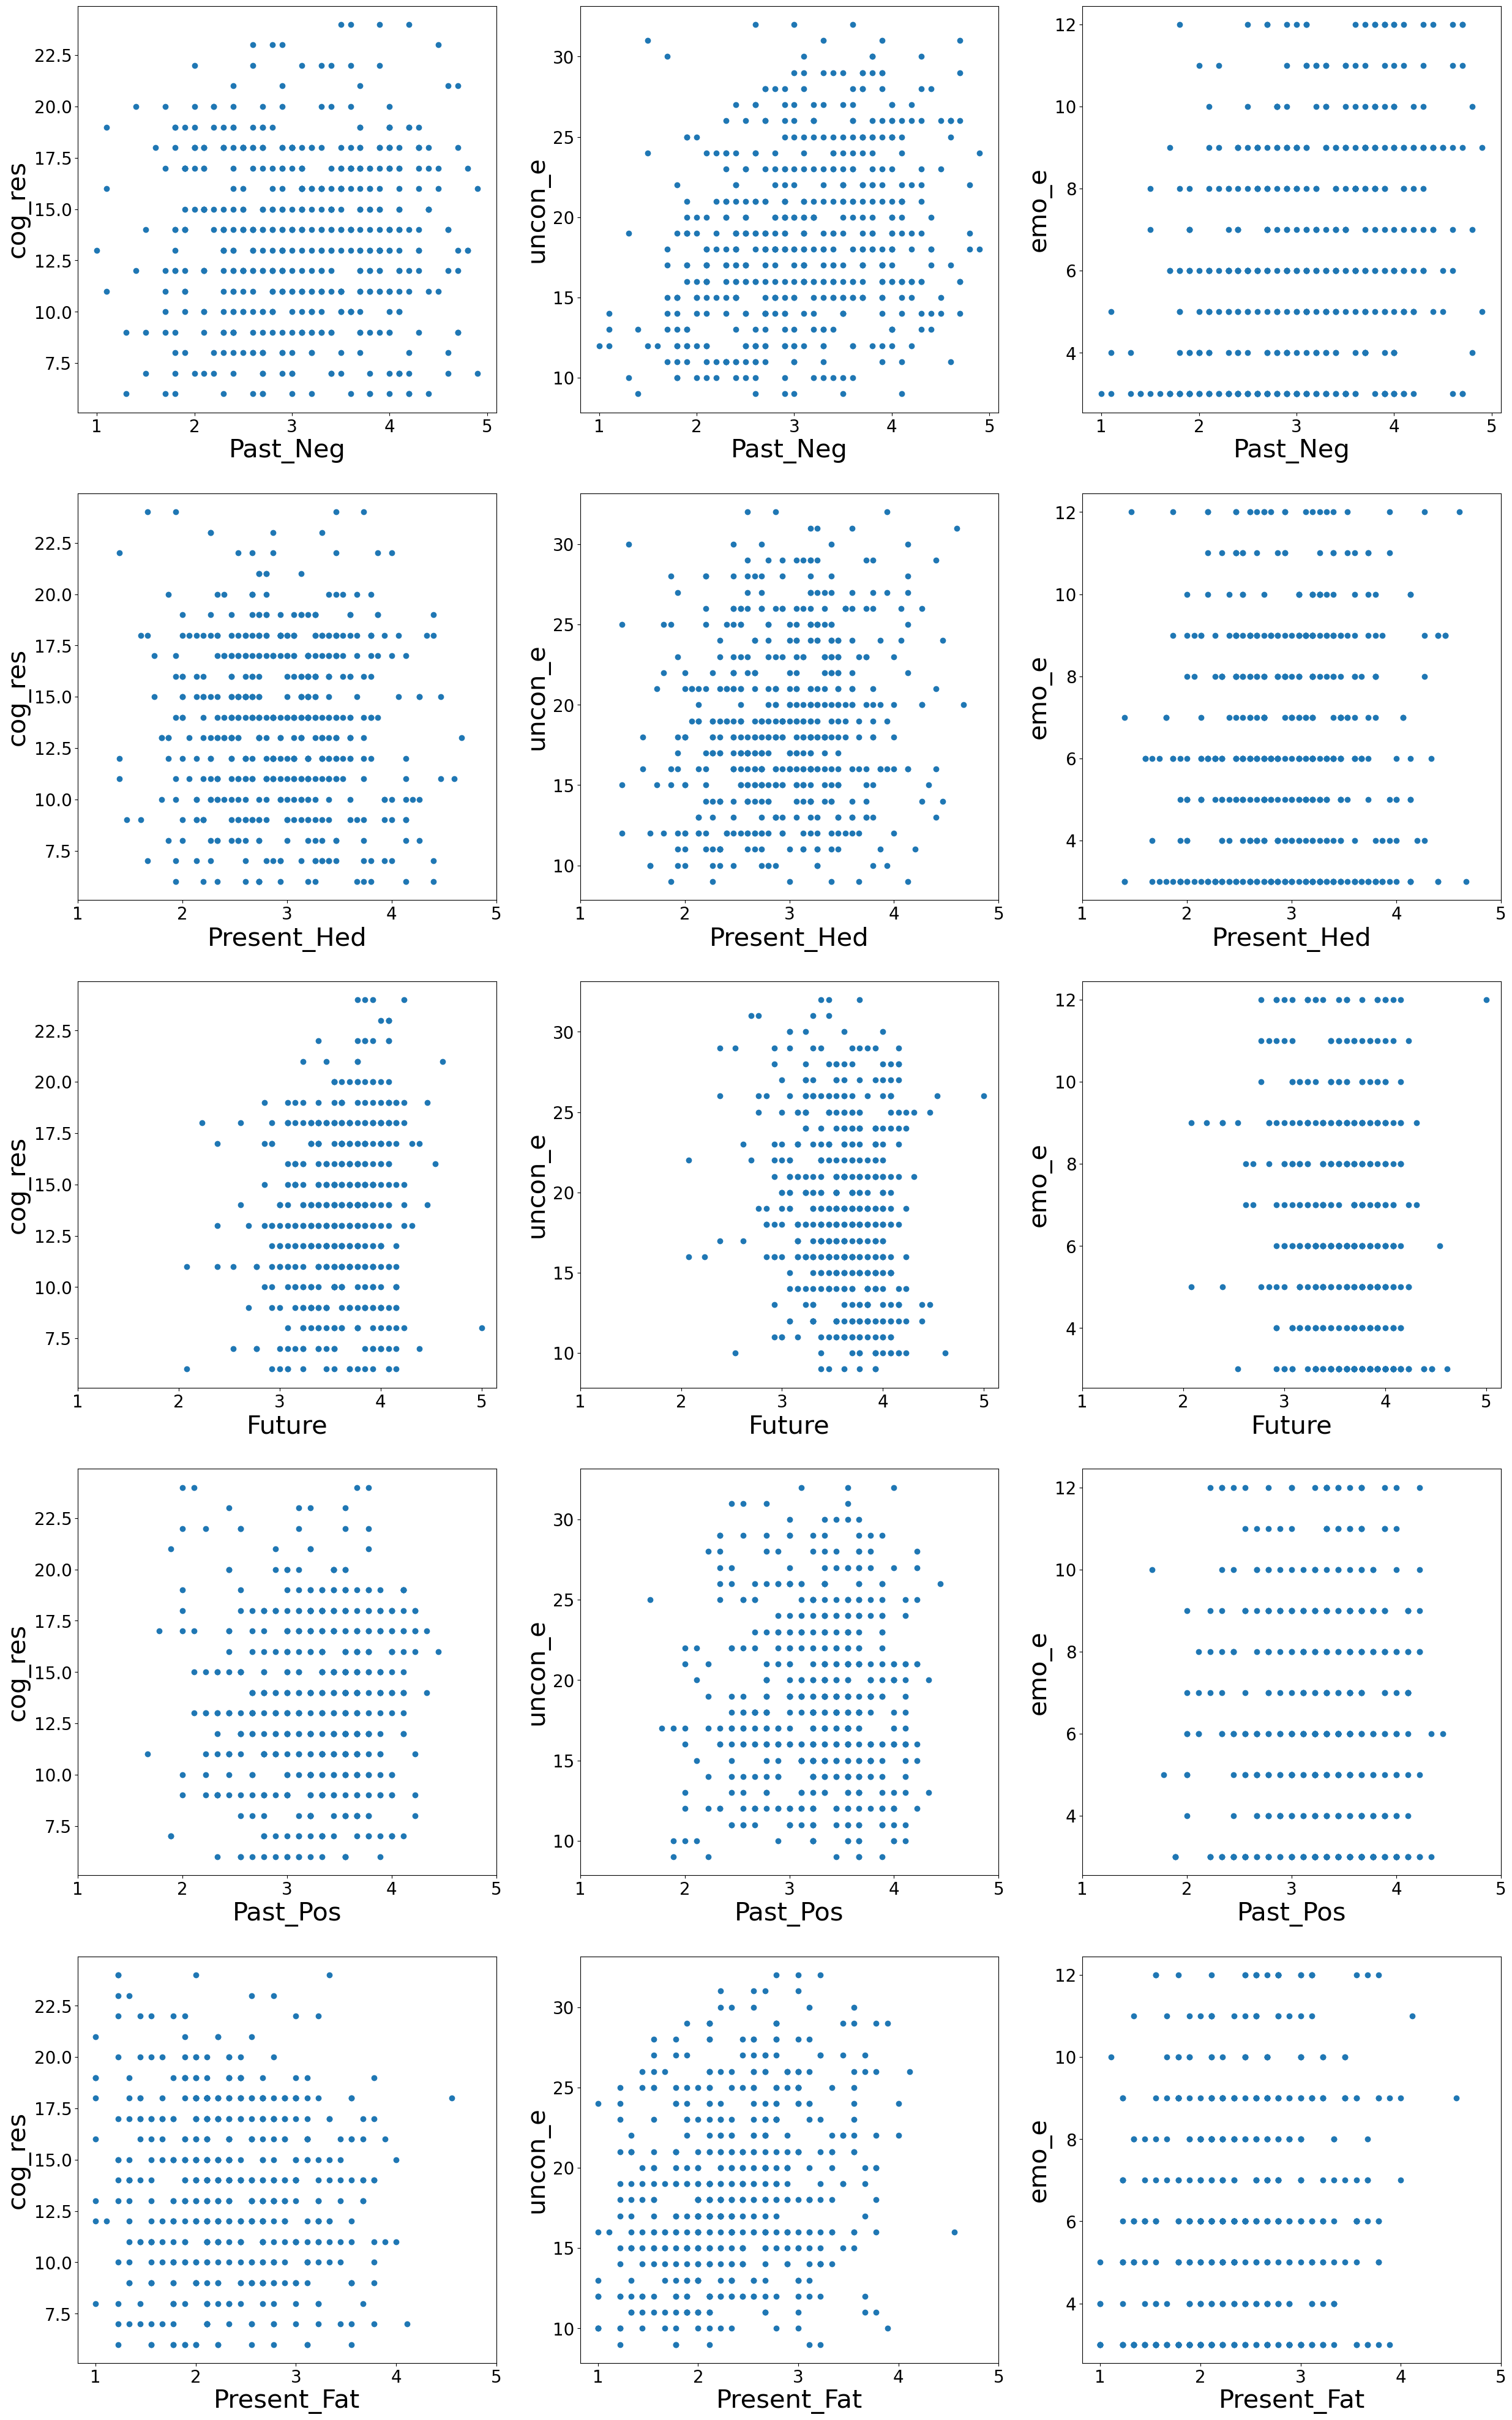

In [19]:
# FTP和三个因变量的相关
s=30
ls=20
fig = plt.figure(figsize=(30,50));
k=0
for i in range(0,5):
    k=k+1
    for j in range(10,13):
        plt.subplot(5,3,k)
        x = np.array(data_all.iloc[:,i])
        y = np.array(data_all.iloc[:,j])
        plt.scatter(x, y)
        plt.ylabel(data_all.columns[j],fontsize=s);plt.xlabel(data_all.columns[i],fontsize=s)
        plt.tick_params(labelsize=ls)
        x=plt.xticks(np.arange(1,6))
        if k!=3 and k!=6 and k!=9 and k!=12:
            k=k+1

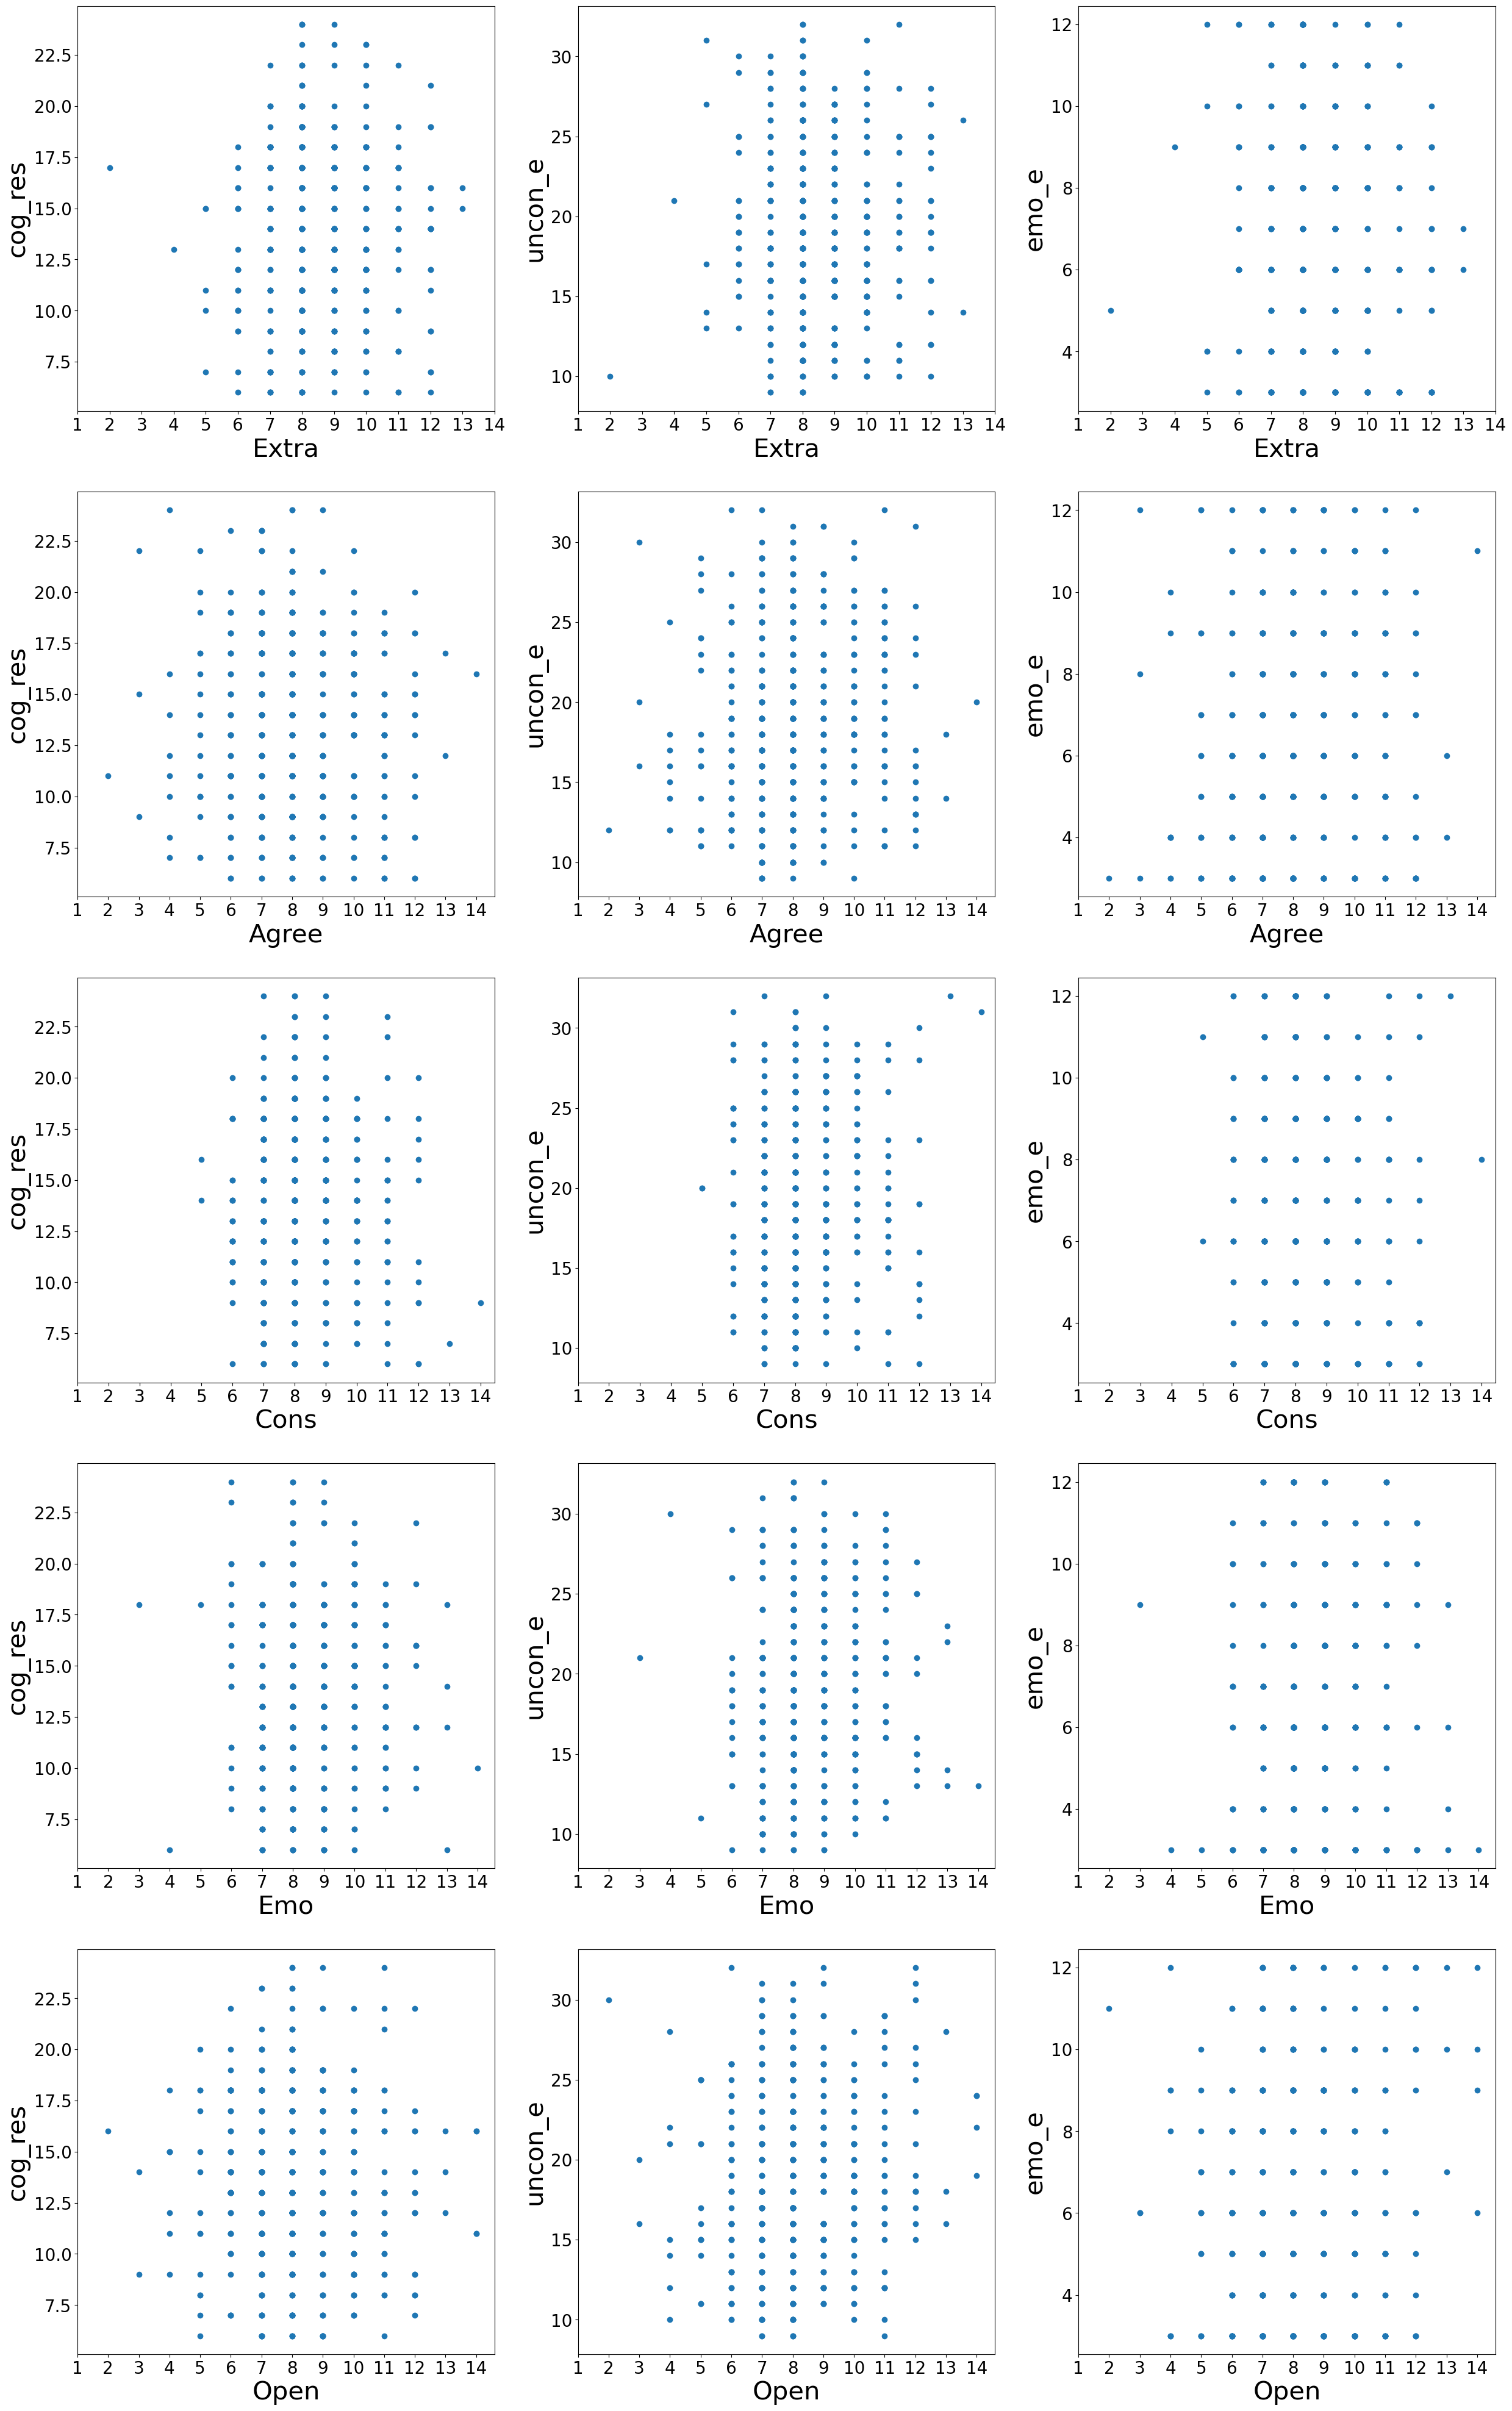

In [129]:
# 大五人格和三个因变量的相关
fig = plt.figure(figsize=(30,50));
k=0
for i in range(5,10):
    k=k+1
    for j in range(10,13):
        plt.subplot(5,3,k)
        x = np.array(data_all.iloc[:,i])
        y = np.array(data_all.iloc[:,j])
        plt.scatter(x, y)
        plt.ylabel(data_all.columns[j],fontsize=s);plt.xlabel(data_all.columns[i],fontsize=s)
        plt.tick_params(labelsize=ls)
        x=plt.xticks(np.arange(1,15))
        if k!=3 and k!=6 and k!=9 and k!=12:
            k=k+1

In [20]:
x = data_all.values
cor=np.zeros((x.shape[1],x.shape[1],2))

In [16]:
for i in range(x.shape[1]):
    for j in range(x.shape[1]):
        cor[i,j] = stats.pearsonr(x[:,i],x[:,j])
cor

array([[[ 1.00000000e+00,  0.00000000e+00],
        [ 5.38981434e-02,  2.18933207e-01],
        [-2.45038516e-01,  1.41350007e-08],
        [-1.87593317e-01,  1.60263523e-05],
        [ 4.81151806e-01,  1.33382031e-31],
        [-8.36229277e-02,  5.62202004e-02],
        [ 2.21049586e-01,  3.36928541e-07],
        [ 3.10779629e-03,  9.43529261e-01],
        [ 2.04748916e-01,  2.39570551e-06],
        [-4.03283702e-02,  3.57802509e-01],
        [ 2.67858796e-02,  5.41445873e-01],
        [ 2.69545764e-01,  3.85313905e-10],
        [ 3.04237832e-01,  1.21699013e-12]],

       [[ 5.38981434e-02,  2.18933207e-01],
        [ 1.00000000e+00,  0.00000000e+00],
        [-9.11743845e-02,  3.73027120e-02],
        [ 1.63949717e-01,  1.68344925e-04],
        [ 3.39925430e-01,  1.38464676e-15],
        [ 1.03396631e-01,  1.81272222e-02],
        [ 1.37296988e-01,  1.66512832e-03],
        [ 1.17474698e-01,  7.21279074e-03],
        [-7.26942341e-02,  9.70991916e-02],
        [ 1.28767154e-01,  3.2

In [17]:
# 相关显著性p值
p_value = np.zeros((x.shape[1],x.shape[1]))
for i in range(x.shape[1]):
    for j in range(x.shape[1]):
        p_value[i,j] = cor[i,j,1]
p_value_matrix = p_value
correlation_matrix = np.corrcoef(data_all, rowvar=0) # 相关性分析 

[Text(0, 0, 'Past_Neg'),
 Text(0, 1, 'Present_Hed'),
 Text(0, 2, 'Future'),
 Text(0, 3, 'Past_Pos'),
 Text(0, 4, 'Present_Fat'),
 Text(0, 5, 'Extra'),
 Text(0, 6, 'Agree'),
 Text(0, 7, 'Cons'),
 Text(0, 8, 'Emo'),
 Text(0, 9, 'Open'),
 Text(0, 10, 'cog_res'),
 Text(0, 11, 'uncon_e'),
 Text(0, 12, 'emo_e')]

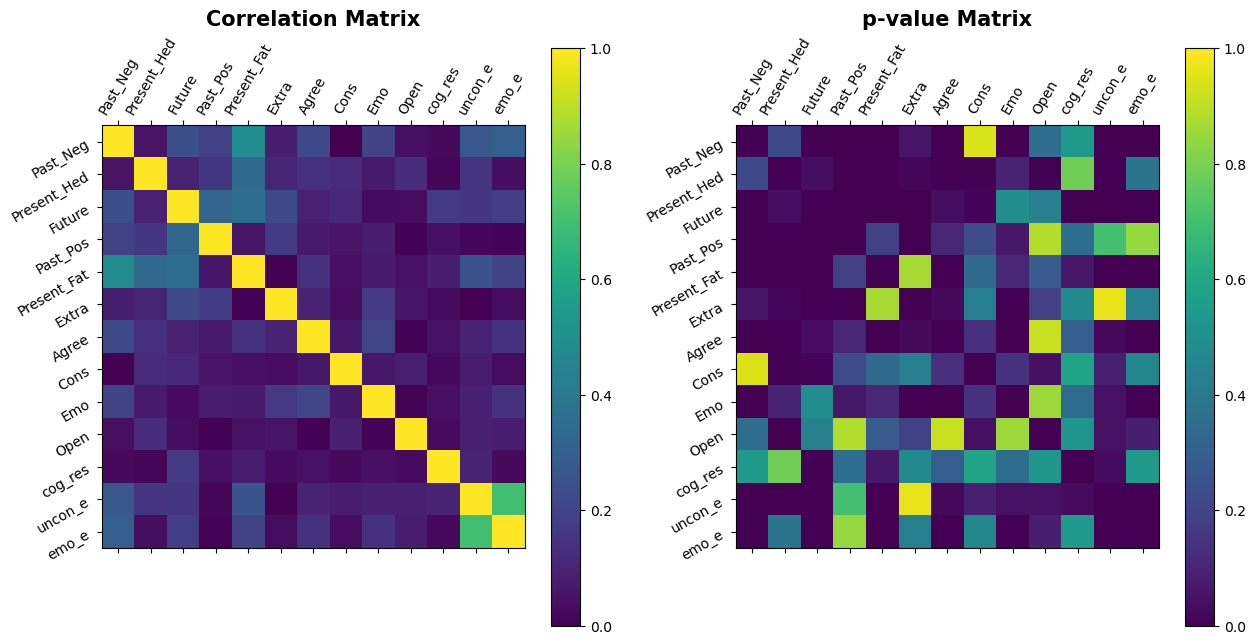

In [18]:
fig = plt.figure(figsize=(15, 7.5)) # 调用figure创建一个绘图对象 


ax = fig.add_subplot(121) # 设置1个子网格并添加子网格对象 
hot_img0 = ax.matshow(np.abs(correlation_matrix), vmin=0, vmax=1) 
 # 绘制热力图，值域从0到1 
fig.colorbar(hot_img0) # 为热力图生成颜色渐变条 
ticks = np.arange(0, 13, 1) # 生成0～13，步长为1 
ax.set_xticks(ticks) # 生成x轴刻度 
ax.set_yticks(ticks) # 设置y轴刻度 
plt.xticks(rotation=60)
plt.yticks(rotation=30)
plt.title('Correlation Matrix',fontsize=15,fontweight='bold') 
names = data_all.columns # 生成坐标轴标签文字 
ax.set_xticklabels(names) # 生成x轴标签 
ax.set_yticklabels(names) # 生成y轴标签

ax = fig.add_subplot(122) # 设置1个子网格并添加子网格对象 
hot_img1 = ax.matshow(p_value, vmin=0, vmax=1) 
 # 绘制热力图，值域从0到1 
fig.colorbar(hot_img1) # 为热力图生成颜色渐变条 
ticks = np.arange(0, 13, 1) # 生成0～13，步长为1 
ax.set_xticks(ticks) # 生成x轴刻度 
ax.set_yticks(ticks) # 设置y轴刻度 
plt.xticks(rotation=60)
plt.yticks(rotation=30)
plt.title('p-value Matrix',fontsize=15,fontweight='bold') 
names = data_all.columns # 生成坐标轴标签文字 
ax.set_xticklabels(names) # 生成x轴标签 
ax.set_yticklabels(names) # 生成y轴标签

# model_cr

In [30]:
with pm.Model() as model3:
    # 先验分布: alpha, beta, sigma这三个参数是随机变量
    alpha = pm.Normal('alpha',mu=-2,sd=1)
    beta = pm.Normal('beta',mu=0,sd=1, shape=6)
    sigma = pm.HalfNormal('sigma', sd=1, shape=3)
    # 自变量x1~x6是data_all中的标准化得分数据
    x1 = pm.Data("x1", data_all['Future'])
    x2 = pm.Data("x2", data_all['Extra'])
    x3 = pm.Data("x3", data_all['Agree'])
    x4 = pm.Data("x4", data_all['Cons'])
    x5 = pm.Data("x5", data_all['Emo'])
    x6 = pm.Data("x6", data_all['Open'])
    # 正态分布均值是确定性随机变量，这个变量的值完全由右端值确定
    mu = pm.Deterministic("mu", alpha + beta[0]*x1 + beta[1]*x2 + beta[2]*x3 + beta[3]*x4 + beta[4]*x5 + beta[5]*x6)
    # Y的观测值，这是一个特殊的观测随机变量，表示模型数据的可能性。也可以表示模型的似然，通过 observed 参数来告诉这个变量其值是已经被观测到了的，不会被拟合算法改变
    # 假定因变量服从正态分布
    y_cr = pm.Normal('y_cr', mu=mu, sd=sigma[0],observed=data_all['cog_res'] )
    y_ue = pm.Normal('y_ue', mu=mu, sd=sigma[1],observed=data_all['uncon_e'] )
    y_ee = pm.Normal('y_ee', mu=mu, sd=sigma[2], observed=data_all['emo_e'] )
    # 先验预测检查
    prior_checks = pm.sample_prior_predictive(samples=50)

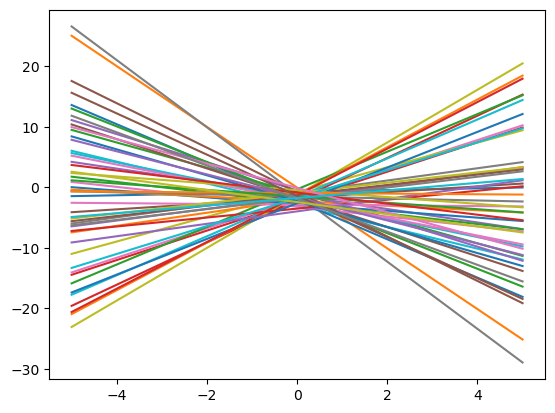

In [31]:
x = np.linspace(-5, 5, 50) # 生成从-2，2之间的50个假数据

for a, b in zip(prior_checks["alpha"], prior_checks["beta"]):
    y = a + b[0] * x + b[1] * x + b[2] * x + b[3] * x + b[4] * x + b[5] * x         # 基于假数据生成预测值
    plt.plot(x,y)

In [32]:
pm.model_to_graphviz(model3)

ImportError: This function requires the python library graphviz, along with binaries. The easiest way to install all of this is by running

	conda install -c conda-forge python-graphviz

In [33]:
#采样过程仍在该容器中进行
with model3:
    # 使用mcmc方法进行采样，draws为采样次数，tune为调整采样策略的次数，这些次数将在采样结束后被丢弃，
    # target_accept为接受率， return_inferencedata=True为该函数返回的对象是arviz.InnferenceData对象
    # chains为我们采样的链数，cores为我们的调用的cpu数，多个链可以在多个cpu中并行计算，我们在和鲸中调用的cpu数为2
    trace3 = pm.sample(draws = 2000, tune=1000, target_accept=0.9,chains=2, cores= 2,progressbar = True)

C:\Users\star CR\AppData\Local\Temp\ipykernel_18608\3781648336.py:6: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace3 = pm.sample(draws = 2000, tune=1000, target_accept=0.9,chains=2, cores= 2,progressbar = True)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
D:\ANACONDA3\envs\r_tutorial\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
D:\ANACONDA3\envs\r_tutorial\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]



KeyboardInterrupt



In [ ]:
# 绘制特定参数的采样情况，选取对象为trace，选取其中'alpha','beta','sigma'三个参数
az.plot_trace(trace3,var_names=['alpha','beta','sigma'])

In [ ]:
az.summary(trace3, var_names=['alpha','beta','sigma'], kind="diagnostics")

In [ ]:
with model3:
    #pm.sample_posterior_predictive()利用trace.posterior的后验分布计算后验预测分布
    ppc_y3 = pm.sample_posterior_predictive(trace1, var_names=["mu", "sigma", "y_cr"])
    #将pymc3 数据转换为 InferenceData 对象。
    ppc_data3 = az.from_pymc3(trace = trace1, posterior_predictive=ppc_y1)

In [ ]:
az.plot_ppc(ppc_data1)

In [30]:
with pm.Model() as model3:
    # 先验分布: alpha, beta, sigma这三个参数是随机变量
    alpha = pm.Normal('alpha',mu=-2,sd=1)
    beta = pm.Normal('beta',mu=0,sd=1, shape=6)
    sigma = pm.HalfNormal('sigma', sd=1, shape=3)
    # 自变量x1~x6是data_all中的标准化得分数据
    x1 = pm.Data("x1", data_all['Future'])
    x2 = pm.Data("x2", data_all['Extra'])
    x3 = pm.Data("x3", data_all['Agree'])
    x4 = pm.Data("x4", data_all['Cons'])
    x5 = pm.Data("x5", data_all['Emo'])
    x6 = pm.Data("x6", data_all['Open'])
    # 正态分布均值是确定性随机变量，这个变量的值完全由右端值确定
    mu = pm.Deterministic("mu", alpha + beta[0]*x1 + beta[1]*x2 + beta[2]*x3 + beta[3]*x4 + beta[4]*x5 + beta[5]*x6)
    # Y的观测值，这是一个特殊的观测随机变量，表示模型数据的可能性。也可以表示模型的似然，通过 observed 参数来告诉这个变量其值是已经被观测到了的，不会被拟合算法改变
    # 假定因变量服从正态分布
    y_cr = pm.Normal('y_cr', mu=mu, sd=sigma[0],observed=data_all['cog_res'] )
    y_ue = pm.Normal('y_ue', mu=mu, sd=sigma[1],observed=data_all['uncon_e'] )
    y_ee = pm.Normal('y_ee', mu=mu, sd=sigma[2], observed=data_all['emo_e'] )
    # 先验预测检查
    prior_checks = pm.sample_prior_predictive(samples=50)

In [ ]:
x = np.linspace(-5, 5, 50) # 生成从-2，2之间的50个假数据

for a, b in zip(prior_checks["alpha"], prior_checks["beta"]):
    y = a + b[0] * x + b[1] * x + b[2] * x + b[3] * x + b[4] * x + b[5] * x         # 基于假数据生成预测值
    plt.plot(x,y)